Load R extension to use the notebook

In [ ]:
%load_ext rpy2.ipython

In [ ]:
#Import gdown to download input files from google drive here.
import gdown

#Dowload input files from my Google Drive to local environment.
file_id="1UNUwtZOHNINm9ZwwpinV_pysDzBYmTp3"
url = 'https://drive.google.com/uc?id=' + file_id
output = 'CancerProject.zip'
gdown.download(url, output, quiet=False)
#

Downloading...
From: https://drive.google.com/uc?id=1UNUwtZOHNINm9ZwwpinV_pysDzBYmTp3
To: /content/CancerProject.zip
100%|██████████| 11.4M/11.4M [00:00<00:00, 20.7MB/s]


'CancerProject.zip'

In [ ]:
#uncompress the files
import zipfile

zip_ref = zipfile.ZipFile("CancerProject.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
%%R
#this takes some 25minm to conclude
install.packages("VennDiagram")
install.packages("tidyverse")
install.packages("cluster")
install.packages("factoextra")
install.packages("dendextend")
install.packages("ggfortify")
install.packages("ape")
install.packages("rJava")
install.packages("RColorBrewer")
install.packages("reshape2")
install.packages("tidyr")
install.packages("ggplot2")
install.packages("ggrepel")
install.packages("cowplot")
install.packages("ggdendro")
install.packages("grid")
install.packages("data.table")
install.packages("gplots")
install.packages("imager")
install.packages("repr")
install.packages("ggpubr")
install.packages("corrplot")
install.packages("Hmisc")
install.packages("plotly")
install.packages("PerformanceAnalytics")


A saída de streaming foi truncada nas últimas 5000 linhas.
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: 

R[write to console]: downloaded 104 KB


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/SQUAREM_2021.1.tar.gz'

R[write to console]: Content type 'application/

In [ ]:
%%R
#dependencies
library("VennDiagram")
library("tidyverse")  # data manipulation
library("cluster")    # clustering algorithms
library("factoextra") # clustering visualization
library("dendextend")
library("ggfortify")
library("ape")
library("rJava")
library("RColorBrewer")
library("reshape2")
library("tidyr")
library("ggrepel")
require("cowplot")
library("ggplot2")
library("ggdendro")
library("grid")
library("data.table")
library("gplots")
library("imager")
library("repr")
library("ggpubr")
library("corrplot")
library("Hmisc")
library("plotly")
library("PerformanceAnalytics")


R[write to console]: Error in library("VennDiagram") : 
  there is no package called ‘VennDiagram’




Error in library("VennDiagram") : 
  there is no package called ‘VennDiagram’


RInterpreterError: ignored

In [ ]:
#BASENAME - this is the fold for the outputs
%%R
base_name <- "WNTPathway"
system(paste0("mkdir ", base_name))



In [ ]:
%%R
getwd()

[1] "/content"


In [ ]:
%%R
#load PTTCS

base_dir <- "./Code/wetransfer-8da178/PTTCS_up/"
cancer_type_list <- c("KIRP_PTTCS_UP",
				  "PRAD_PTTCS_UP",	
				  "THCA_PTTCS_UP",
				  "LIHC_PTTCS_UP",	
				  "LUSC_PTTCS_UP",	
				  "STAD_PTTCS_UP")


all_samples <- data.frame(matrix(ncol = 5, nrow = 0))
x <- c("UniprotKB","GeneSymbol","Connections","SampleId","Cancer")
colnames(all_samples) <- x

for(cancer_type in cancer_type_list){
	sample_file_list <- list.files(paste0(base_dir,cancer_type,"/"))
	print(paste0("Cancer: ",cancer_type ))
	print(sample_file_list)
	for(sample_file in sample_file_list){
		print(paste0("File name: ",sample_file))
		if(grepl("TCGA",sample_file)==1){
			
			sample_data <- read.csv(paste0(base_dir,cancer_type,"/",sample_file),
				sep=",", 
				header=FALSE)
			
			names(sample_data) <- sample_data[4,]
			sample_data <- sample_data[5:nrow(sample_data),]
			sample_data$SampleId <- gsub(".csv","",sample_file)
			sample_data$Cancer <- cancer_type
			
			all_samples <- rbind(all_samples,sample_data)
		}
		
	}
	
}

[1] "Cancer: KIRP_PTTCS_UP"
 [1] "TCGA-A4-A4ZT.csv" "TCGA-A4-A57E.csv" "TCGA-B9-4115.csv" "TCGA-BQ-5875.csv"
 [5] "TCGA-BQ-5877.csv" "TCGA-BQ-5878.csv" "TCGA-BQ-5879.csv" "TCGA-BQ-5882.csv"
 [9] "TCGA-BQ-5884.csv" "TCGA-BQ-5887.csv" "TCGA-BQ-5888.csv" "TCGA-BQ-5890.csv"
[13] "TCGA-BQ-5891.csv" "TCGA-BQ-5894.csv" "TCGA-BQ-7044.csv" "TCGA-BQ-7045.csv"
[17] "TCGA-BQ-7046.csv" "TCGA-BQ-7051.csv" "TCGA-BQ-7055.csv" "TCGA-BQ-7059.csv"
[21] "TCGA-BQ-7061.csv" "TCGA-DZ-6132.csv" "TCGA-DZ-6133.csv" "TCGA-DZ-6134.csv"
[25] "TCGA-GL-6846.csv" "TCGA-GL-7966.csv" "TCGA-GL-A59R.csv" "TCGA-GL-A9DE.csv"
[29] "TCGA-P4-A5E8.csv" "TCGA-P4-A5ED.csv" "TCGA-Y8-A8RY.csv"
[1] "File name: TCGA-A4-A4ZT.csv"
[1] "File name: TCGA-A4-A57E.csv"
[1] "File name: TCGA-B9-4115.csv"
[1] "File name: TCGA-BQ-5875.csv"
[1] "File name: TCGA-BQ-5877.csv"
[1] "File name: TCGA-BQ-5878.csv"
[1] "File name: TCGA-BQ-5879.csv"
[1] "File name: TCGA-BQ-5882.csv"
[1] "File name: TCGA-BQ-5884.csv"
[1] "File name: TCGA-BQ-5887.csv"
[1]

In [ ]:
%%R
#unique connections

uniqueConnections <- unique(all_samples[c("GeneSymbol","Connections")])

getConnections <- function(x){
  y <- unique(uniqueConnections[uniqueConnections$GeneSymbol==x,]$Connections)
  
  if(length(y)>0){
    return(y)
  }
  else{
    return(0)
  }
  
}
#test
#print(getConnections("AP2A2"))

In [ ]:
%%R
#load VIAS

vias_dir <- "./Code/wetransfer-8da178/Vias_Wnt/"

#new cancer list: exclude according to Nicolas comments on page 6
cancer_list <- c( "KIRP_GVM","PRAD_GVM","THCA_GVM", 
			   "LIHC_GVM","LUSC_GVM","STAD_GVM")

#old list
#cancer_list <- c( "KIRP_GVM",	"LUAD_GVM",	"PRAD_GVM",	"THCA_GVM", 
#	"KIRC_GVM",	"LIHC_GVM",	"LUSC_GVM",	"STAD_GVM",    "UCEC_GVM")
	
	
all_vias <- data.frame(matrix(ncol = 8, nrow = 0))
y <- c("EGF","FGF","HEDGEHOG","MTOR","NFKB","NOTCH","TGFBETA","WNT")
colnames(all_vias) <- y



for(cancer in cancer_list){
	#read tcga files
	vias_file_list <- list.files(paste0(vias_dir,cancer,"/"))
	print(paste0("Cancer: ",cancer ))
	print(vias_file_list)
	#repeat for each file
	for(vias_file in vias_file_list){
		print(paste0("File name: ",vias_file))
		#consider only files from tcga
		if(grepl("TCGA",vias_file)==1){
			
			#get the data
			vias_data <- read.csv(paste0(vias_dir,cancer,"/",vias_file),
				sep=",", 
				header=FALSE)
			#use this line as the heading of the data frame
			names(vias_data) <- vias_data[2,]
			#use the remaining lines as data
			vias_data <- vias_data[3:nrow(vias_data),]
			
			#add those two columns 
			vias_data$SampleId <- gsub(".csv","",vias_file)
			vias_data$Cancer <- cancer
			
			#concatenate this file to the main data frame
			all_vias <- rbind(all_vias,vias_data)
		}
		
	}
	
}



[1] "Cancer: KIRP_GVM"
 [1] "TCGA-A4-A4ZT.csv" "TCGA-A4-A57E.csv" "TCGA-B9-4115.csv" "TCGA-BQ-5875.csv"
 [5] "TCGA-BQ-5877.csv" "TCGA-BQ-5878.csv" "TCGA-BQ-5879.csv" "TCGA-BQ-5882.csv"
 [9] "TCGA-BQ-5884.csv" "TCGA-BQ-5887.csv" "TCGA-BQ-5888.csv" "TCGA-BQ-5890.csv"
[13] "TCGA-BQ-5891.csv" "TCGA-BQ-5894.csv" "TCGA-BQ-7044.csv" "TCGA-BQ-7045.csv"
[17] "TCGA-BQ-7046.csv" "TCGA-BQ-7051.csv" "TCGA-BQ-7055.csv" "TCGA-BQ-7059.csv"
[21] "TCGA-BQ-7061.csv" "TCGA-DZ-6132.csv" "TCGA-DZ-6133.csv" "TCGA-DZ-6134.csv"
[25] "TCGA-GL-6846.csv" "TCGA-GL-7966.csv" "TCGA-GL-A59R.csv" "TCGA-GL-A9DE.csv"
[29] "TCGA-P4-A5E8.csv" "TCGA-P4-A5ED.csv" "TCGA-Y8-A8RY.csv"
[1] "File name: TCGA-A4-A4ZT.csv"
[1] "File name: TCGA-A4-A57E.csv"
[1] "File name: TCGA-B9-4115.csv"
[1] "File name: TCGA-BQ-5875.csv"
[1] "File name: TCGA-BQ-5877.csv"
[1] "File name: TCGA-BQ-5878.csv"
[1] "File name: TCGA-BQ-5879.csv"
[1] "File name: TCGA-BQ-5882.csv"
[1] "File name: TCGA-BQ-5884.csv"
[1] "File name: TCGA-BQ-5887.csv"
[1] "Fil

## Number of unique genes DE

In [ ]:
%%R
#Unique DE genes
count(unique(all_samples["GeneSymbol"]))


  

     n
1 9065


In [ ]:
%%R
#prepare data for plotting
all_vias_melt  <-  melt(all_vias, id.var= c("SampleId","Cancer"))

#change na -> NA
all_vias_melt[] <- lapply(all_vias_melt, function(x) gsub("na",NA,x)  )

#get only complete cases
all_vias_melt_complete <- all_vias_melt[complete.cases(all_vias_melt),]

#add the number of connection per gene from the all_samples dataframe
all_vias_melt_complete$Connections <- 0

#use this accessory function, defined above to get the connection of each gene
all_vias_melt_complete$Connections <- lapply(all_vias_melt_complete[,c("value")],  getConnections)

#
all_vias_melt_complete$Connections <- as.numeric(all_vias_melt_complete$Connections)

unique(all_vias_melt_complete$Cancer)


#all_vias_melt_complete$Cancer <- factor(all_vias_melt_complete$Cancer , levels=c("STAD_GVM","LUAD_GVM", "LUSC_GVM", "LIHC_GVM","KIRC_GVM", "KIRP_GVM","BRCA_GVM","THCA_GVM","PRAD_GVM"))

all_vias_melt_complete$Cancer <- factor(all_vias_melt_complete$Cancer , levels=c("STAD_GVM", "LUSC_GVM", "LIHC_GVM","KIRP_GVM","THCA_GVM","PRAD_GVM"))

## Figure 2: ANOVA

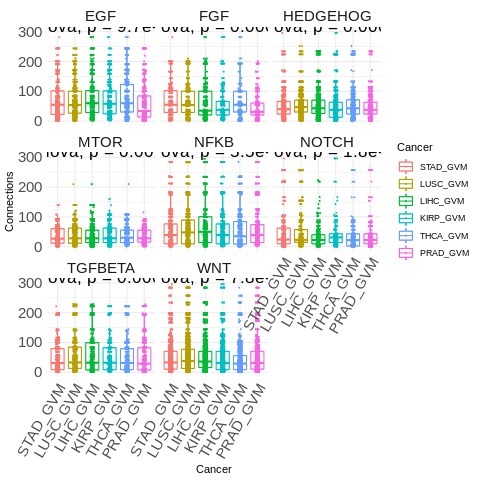

In [ ]:
%%R
#create output file

#all_vias_melt_complete <- complete.cases(all_vias_melt_complete)

png(filename=paste0("./cancer_comparison_per_pathway.png"),  width=1920, height=1080)
plt.box <- ggboxplot(all_vias_melt_complete, x = "Cancer", y="Connections", color= "Cancer", 
			fill = "Cancer", alpha= 0.5) +
		 geom_boxplot(aes(color = Cancer),
			outlier.colour = "white",
			outlier.fill = "white") +
	  	 geom_jitter(aes(color = Cancer), width = 0.1, size = 0.3) +
	  	 theme_minimal()+

		# labs(title = paste0(gene_list," (", population,")"),
		#      subtitle = "(Dots represent metacells)",
		#      y = "log2(Expression)" 
		#      ) +
		 theme(axis.text.x=element_text(angle=60,hjust=1)) +
		 theme(legend.position='right') +
		 theme(axis.text = element_text(size = 15)) +  # change text size of theme components
		
		 ylim(0, 300)+
		
		 stat_compare_means(method = "anova", label.y = 300, size=6)+
		 facet_wrap(.~variable,  ncol=3) +
		 theme(strip.text.x = element_text(size = 15)) #size of the facets titles
		
		#facet_grid(vars(variable), vars(Cancer))      
		          
		          
plt.box$layers[[2]]$aes_params$textsize <- 3 #size of the anova labels

print(plt.box)          

dev.off()

plt.box

## Kruskal-Walis test per pathway

In [ ]:
%%R
#kruskal per pathway

for (pathways in unique(all_vias_melt_complete$variable) ){
	df=filter(all_vias_melt_complete, variable == pathways)
	#log transform
	#df$Connections = log(df$Connections)
	
	print(pathways)
	print("Kruskal-Wallis")
	print(kruskal.test(Connections ~ Cancer, data = df))
	
}



[1] "EGF"
[1] "Kruskal-Wallis"

	Kruskal-Wallis rank sum test

data:  Connections by Cancer
Kruskal-Wallis chi-squared = 46.005, df = 5, p-value = 9.06e-09

[1] "FGF"
[1] "Kruskal-Wallis"

	Kruskal-Wallis rank sum test

data:  Connections by Cancer
Kruskal-Wallis chi-squared = 24.275, df = 5, p-value = 0.0001923

[1] "HEDGEHOG"
[1] "Kruskal-Wallis"

	Kruskal-Wallis rank sum test

data:  Connections by Cancer
Kruskal-Wallis chi-squared = 45.024, df = 5, p-value = 1.435e-08

[1] "MTOR"
[1] "Kruskal-Wallis"

	Kruskal-Wallis rank sum test

data:  Connections by Cancer
Kruskal-Wallis chi-squared = 7.8529, df = 5, p-value = 0.1645

[1] "NFKB"
[1] "Kruskal-Wallis"

	Kruskal-Wallis rank sum test

data:  Connections by Cancer
Kruskal-Wallis chi-squared = 42.375, df = 5, p-value = 4.946e-08

[1] "NOTCH"
[1] "Kruskal-Wallis"

	Kruskal-Wallis rank sum test

data:  Connections by Cancer
Kruskal-Wallis chi-squared = 45.524, df = 5, p-value = 1.135e-08

[1] "TGFBETA"
[1] "Kruskal-Wallis"

	Kruskal-Wa

## Wilcoxon Test Per Pathway

In [ ]:
%%R
#wilcox per pathway
for (pathways in unique(all_vias_melt_complete$variable) ){
	
	df=filter(all_vias_melt_complete, variable == pathways)
	

	#pairwise pathway comparison 
	print(paste0("Wilcox for:", pathways))

	
	#log transform
	#df$Connections = log(df$Connections)

	#pairwise.wilcox.test(df$Connections, df$Cancer, p.adjust.method = "bonf")
	print(pairwise.wilcox.test(df$Connections, df$Cancer, p.adjust.method = "bonf"))
	

}

[1] "Wilcox for:EGF"

	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  df$Connections and df$Cancer 

         STAD_GVM LUSC_GVM LIHC_GVM KIRP_GVM THCA_GVM
LUSC_GVM 1.0000   -        -        -        -       
LIHC_GVM 0.4252   0.1379   -        -        -       
KIRP_GVM 0.4287   0.2160   1.0000   -        -       
THCA_GVM 0.6529   0.2251   1.0000   1.0000   -       
PRAD_GVM 0.0233   0.0046   4.3e-07  7.8e-06  3.8e-06 

P value adjustment method: bonferroni 
[1] "Wilcox for:FGF"

	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  df$Connections and df$Cancer 

         STAD_GVM LUSC_GVM LIHC_GVM KIRP_GVM THCA_GVM
LUSC_GVM 1.00000  -        -        -        -       
LIHC_GVM 0.06410  1.00000  -        -        -       
KIRP_GVM 1.00000  1.00000  1.00000  -        -       
THCA_GVM 1.00000  1.00000  1.00000  1.00000  -       
PRAD_GVM 0.00022  0.00409  0.45633  0.03852  0.00671 

P value adjustment method: bonf

## Summary Statistics

In [ ]:
%%R
install.packages("fitdistrplus")
library(fitdistrplus)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/fitdistrplus_1.1-6.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 2401889 bytes (2.3 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =


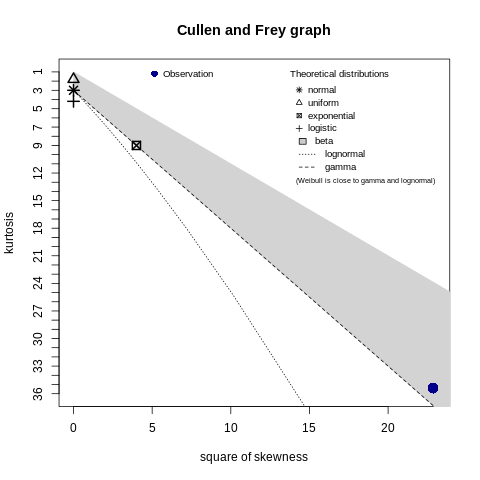

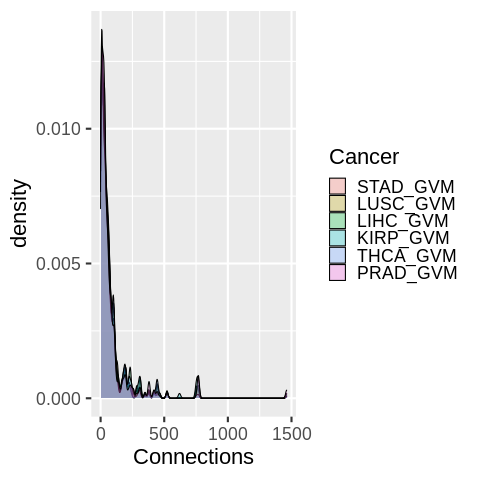

In [ ]:
%%R
#summary statistics

descdist(all_vias_melt_complete$Connections, discrete = FALSE)

df=all_vias_melt_complete

df$Connections = log(df$Connections)

p<-ggplot(all_vias_melt_complete, aes(x=Connections, fill=Cancer)) +
	geom_density(alpha=0.3)+theme_grey(base_size = 22)
	#ggtitle("Density of normalized connections per cancer class") +
	#ylab("Density") + xlab("Normalized connections")+
	#scale_x_continuous(limits = c(0, 100))


print(p)          


In [ ]:
%%R
#select extremes
all_vias_melt_complete$Classes <- 0


all_vias_melt_complete$Classes[which(all_vias_melt_complete$Cancer == "STAD_GVM")] = "H"
#all_vias_melt_complete$Classes[which(all_vias_melt_complete$Cancer == "LUAD_GVM")] = "H"
all_vias_melt_complete$Classes[which(all_vias_melt_complete$Cancer == "LUSC_GVM")] = "H"
all_vias_melt_complete$Classes[which(all_vias_melt_complete$Cancer == "LIHC_GVM")] = "H"
#all_vias_melt_complete$Classes[which(all_vias_melt_complete$Cancer == "KIRC_GVM")] = "H"


all_vias_melt_complete$Classes[which(all_vias_melt_complete$Cancer == "KIRP_GVM")] = "L"
#all_vias_melt_complete$Classes[which(all_vias_melt_complete$Cancer == "BRCA_GVM")] = "L"
all_vias_melt_complete$Classes[which(all_vias_melt_complete$Cancer == "THCA_GVM")] = "L"
all_vias_melt_complete$Classes[which(all_vias_melt_complete$Cancer == "PRAD_GVM")] = "L"




all_vias_melt_complete_extremes <- all_vias_melt_complete %>% filter(Classes != 0)
  

In [ ]:
%%R
#get number of samples
gene_counting_SAMPLES <- all_vias_melt_complete %>% 
	group_by(Cancer) %>%          
	summarise(n = n_distinct(SampleId))
	
gene_counting_SAMPLES <- as.data.frame(gene_counting_SAMPLES)

gene_counting_SAMPLES <- gene_counting_SAMPLES[complete.cases(gene_counting_SAMPLES),]

rownames(gene_counting_SAMPLES) <- gene_counting_SAMPLES[,"Cancer"]	

gene_counting_SAMPLES["STAD_GVM","n"]

[1] 27


In [ ]:
%%R
#get number of samples (here count samples from H and L)
gene_counting_CLASSES <- all_vias_melt_complete %>% 
	group_by(Classes) %>%          
	summarise(n = n_distinct(SampleId))
	
gene_counting_CLASSES <- as.data.frame(gene_counting_CLASSES)

gene_counting_CLASSES <- gene_counting_CLASSES[complete.cases(gene_counting_CLASSES),]

rownames(gene_counting_CLASSES) <- gene_counting_CLASSES[,"Classes"]	

gene_counting_CLASSES

  Classes   n
H       H 125
L       L 135


In [ ]:
%%R
#save NORM connections counting 

#here we count how many times one gene appeared upregulated in samples of one cancer type multiplied by the number of connections of each gene

#genes per cancer type
# gene_counting_4_ANOVA.errado <- all_vias_melt_complete_extremes %>% 
# 					group_by(Classes,value, Connections) %>%   #add connections here
# 					count()

gene_counting_4_ANOVA <- all_vias_melt_complete_extremes %>% 
					group_by(Classes,value, Connections) %>%   #add connections here
					summarise(n = n_distinct(SampleId))


#Add NumSamples column
gene_counting_4_ANOVA$NumSamples <- gene_counting_CLASSES[gene_counting_4_ANOVA$Classes,"n"]

#create total NORMALIZED CONNECTION value here
gene_counting_4_ANOVA$NormCounts <- round(gene_counting_4_ANOVA$n / gene_counting_4_ANOVA$NumSamples,5)


#create total NORMALIZED CONNECTION value here
gene_counting_4_ANOVA$NormConnections <- round(gene_counting_4_ANOVA$Connections * (gene_counting_4_ANOVA$n / gene_counting_4_ANOVA$NumSamples),5)


#supplementary file 2
write.csv(gene_counting_4_ANOVA,paste0("./",base_name,"/gene_counting_4_ANOVA.csv"), row.names = TRUE, col.names = TRUE)



#subset(all_vias_melt_complete_extremes[,all_vias_melt_complete_extremes$value=="PRKCD"])

# 
# all_vias_melt_complete_extremes[ which(all_vias_melt_complete_extremes$value=='PRKACB' 
# 		& all_vias_melt_complete_extremes$SampleId=="TCGA-EJ-7789"
# 		& all_vias_melt_complete_extremes$Cancer=="PRAD_GVM"), ]
# 
# all_vias_melt_complete_extremes[ which(all_vias_melt_complete_extremes$value=='PRKCD' 
# 							& all_vias_melt_complete_extremes$Cancer=="PRAD_GVM"
# 							& all_vias_melt_complete_extremes$SampleId=="TCGA-CH-5761"), ]


`summarise()` has grouped output by 'Classes', 'value'. You can override using the `.groups` argument.


## Figure 3A, B, C, D saved within the folder WNTPathway

In [ ]:
%%R
# NormCounts Density Plot filtered by NormConnections

#!!!!!! ATTENTION: THIS IS WHAT WE WILL USE FINALLY

# Use semi-transparent fill
#Fig3A
png(filename=paste0("./",base_name,"/Fig3A-density_NormConnections_<=27_NormCounts<=0.27.png"),  width=900, height=900)

#counting H
tmp_counting = filter(gene_counting_4_ANOVA, Classes =="H")
length(tmp_counting$Classes)

#counting L
tmp_counting = filter(gene_counting_4_ANOVA, Classes =="L")
length(tmp_counting$Classes)


df1=filter(gene_counting_4_ANOVA, NormConnections <=27)

df1=filter(df1, NormCounts <=0.27)

df1_H=filter(df1, Classes =="H")
print(paste0("Len H: ", length(df1_H$Classes)))

df1_L=filter(df1, Classes =="L")
print(paste0("Len L:  ", length(df1_L$Classes)))


p1<-ggplot(df1, aes(x=NormCounts, fill=Classes)) +
	geom_density(alpha=0.3)+theme_grey(base_size = 22)+
#	ggtitle("Density of normalized counts per cancer class") +
#	ylab("Density") + xlab("Normalized counts")
#	ggtitle("Density of normalized connections per cancer class") +
	ylab("Frequence") + xlab("Normalized counts")+
	scale_x_continuous(limits = c(0, 1))+
	scale_y_continuous(limits = c(0, 13))


print(p1)          

dev.off()

#Fig3B
png(filename=paste0("./",base_name,"/Fig3B-density_NormConnections_>27_NormCounts<=0.27.png"),  width=900, height=900)

df2=filter(gene_counting_4_ANOVA, NormConnections >27)

df2=filter(df2, NormCounts <=0.27)

df2_H=filter(df2, Classes =="H")
print(paste0("Len H:  ", length(df2_H$Classes)))

df2_L=filter(df2, Classes =="L")
print(paste0("Len L:  ", length(df2_L$Classes)))

p2<-ggplot(df2, aes(x=NormCounts, fill=Classes)) +
geom_density(alpha=0.3)+theme_grey(base_size = 22)+
#	ggtitle("Density of normalized counts per cancer class") +
#	ylab("Density") + xlab("Normalized counts")
#	ggtitle("Density of normalized connections per cancer class") +
ylab("Frequence") + xlab("Normalized counts")+
scale_x_continuous(limits = c(0, 1))+
scale_y_continuous(limits = c(0, 13))


print(p2)          

dev.off()

#Fig3C
png(filename=paste0("./",base_name,"/Fig3C-density_NormConnections_>27_NormCounts>0.27AND<0.73.png"),  width=900, height=900)

df3=filter(gene_counting_4_ANOVA, NormConnections >27)

df3=filter(df3, NormCounts >0.27)

df3=filter(df3, NormCounts <=0.73)

df3_H=filter(df3, Classes =="H")
print(paste0("Len H:  ", length(df3_H$Classes)))


df3_L=filter(df3, Classes =="L")
print(paste0("Len L:  ", length(df3_L$Classes)))




p3<-ggplot(df3, aes(x=NormCounts, fill=Classes)) +
geom_density(alpha=0.3)+theme_grey(base_size = 22)+
#	ggtitle("Density of normalized counts per cancer class") +
#	ylab("Density") + xlab("Normalized counts")
#	ggtitle("Density of normalized connections per cancer class") +
ylab("Frequence") + xlab("Normalized counts")+
scale_x_continuous(limits = c(0, 1))+
scale_y_continuous(limits = c(0, 13))


print(p3)          

dev.off()


#Fig3D
png(filename=paste0("./",base_name,"/Fig3D-density_NormConnections_>27_NormCounts>0.73.png"),  width=900, height=900)

df4=filter(gene_counting_4_ANOVA, NormConnections >27)

df4=filter(df4, NormCounts >0.73)

df4_H=filter(df4, Classes =="H")
print(paste0("Len H:  ", length(df4_H$Classes)))


df4_L=filter(df4, Classes =="L")
print(paste0("Len L:  ", length(df4_L$Classes)))


p4<-ggplot(df4, aes(x=NormCounts, fill=Classes)) +
geom_density(alpha=0.3)+theme_grey(base_size = 22)+
#	ggtitle("Density of normalized counts per cancer class") +
#	ylab("Density") + xlab("Normalized counts")
#	ggtitle("Density of normalized connections per cancer class") +
ylab("Frequence") + xlab("Normalized counts")+
scale_x_continuous(limits = c(0, 1))+
scale_y_continuous(limits = c(0, 13))


print(p4)          

dev.off()





[1] "Len H: 531"
[1] "Len L:  509"
[1] "Len H:  12"
[1] "Len L:  14"
[1] "Len H:  57"
[1] "Len L:  36"
[1] "Len H:  9"
[1] "Len L:  0"
png 
  2 


In [ ]:
%%R
#get different genes


gene_counting_4_ANOVA_H <-  subset(gene_counting_4_ANOVA$value, (gene_counting_4_ANOVA$Classes=="H"))
gene_counting_4_ANOVA_L <-  subset(gene_counting_4_ANOVA$value, (gene_counting_4_ANOVA$Classes=="L"))

gene_counting_4_ANOVA_H_only <- setdiff(gene_counting_4_ANOVA_H,gene_counting_4_ANOVA_L)
gene_counting_4_ANOVA_L_only <- setdiff(gene_counting_4_ANOVA_L,gene_counting_4_ANOVA_H)

print("Common genes:")
intersect(gene_counting_4_ANOVA_H_only,gene_counting_4_ANOVA_L_only)

[1] "Common genes:"
character(0)


In [ ]:
%%R
#create mean and stdev
#gene_counting_4_ANOVA$NormConnections <- log(gene_counting_4_ANOVA$NormConnections)

gene_counting_Mean_Stdev <- gene_counting_4_ANOVA %>%
						group_by(value) %>%
						#this is in the paper now
						#summarise(PresentIN=n(), Mean=mean(NormCounts), Stdev=sd(NormCounts), Variance=var(NormCounts))
						#let's try this
						summarise(PresentIN=n(), 
						Mean=mean(NormCounts), #NormConnections
						Stdev=sd(NormCounts), #NormConnections
						Variance=var(NormCounts))#NormConnections 
						

gene_counting_Mean_Stdev <- as.data.frame(gene_counting_Mean_Stdev)

gene_counting_Mean_Stdev <- gene_counting_Mean_Stdev[order(gene_counting_Mean_Stdev$Variance),]


#number of  genes present in both classes
length(complete.cases(gene_counting_Mean_Stdev))

[1] 783


## Supplementary File

In [ ]:
%%R
#gene_counting_Mean_Stdev
write.csv(gene_counting_Mean_Stdev,paste0("./",base_name,"/gene_counting_Mean_Stdev.csv"), row.names = TRUE, col.names = TRUE)


In [ ]:
%%R
#Filter genes with high variance between H and L
gene_counting_Mean_Stdev <-  subset(gene_counting_Mean_Stdev, Variance > 0.005  )

#Filter genes with high variance and present on 6 groups
#gene_counting_Mean_Stdev <-  subset(gene_counting_Mean_Stdev, PresentIN ==2, Variance > 0.005  )


length(gene_counting_Mean_Stdev$value)  #243

gene_counting_Mean_Stdev$value

#check_gene
#subset(gene_counting, gene_counting$ > 0.005) 



  [1] "BCL3"      "ATP6V1E1"  "MAP3K11"   "IFT57"     "RBCK1"     "P4HB"     
  [7] "CELSR3"    "ROR2"      "WNT11"     "SETD7"     "TNFRSF18"  "PARD3"    
 [13] "PLAU"      "RNF43"     "E2F4"      "ID2"       "GNG5"      "SH3GL1"   
 [19] "PDCD4"     "RPS6KA2"   "NEDD4L"    "FOS"       "PARP1"     "GNB1"     
 [25] "CLIP1"     "BIRC3"     "PSME1"     "CCL19"     "DIAPH1"    "LRP2"     
 [31] "INSR"      "FZD6"      "RNF152"    "PRKCI"     "VPS29"     "RPS6"     
 [37] "FMOD"      "ADAM17"    "PSMD13"    "AGO1"      "MALT1"     "ERBB2"    
 [43] "EGFR"      "ULK1"      "CALM1"     "DAG1"      "BMPR2"     "NBL1"     
 [49] "PTPN11"    "LAMTOR2"   "TMED5"     "PSMD10"    "NCK2"      "HEY1"     
 [55] "PPP2R1A"   "CGN"       "CDC73"     "TLE5"      "UBE2N"     "SOX4"     
 [61] "SYVN1"     "CTBP2"     "TBC1D7"    "MAPK1"     "MAP3K7"    "RUNX3"    
 [67] "CCND3"     "PSME2"     "SFRP2"     "HDAC1"     "SOX9"      "UBE2D3"   
 [73] "HRAS"      "LTBR"      "PPP2CA"    "RHOA"      "TUBB4B"  

In [ ]:
%%R
#save NORM connections counting 

#here we count how many times one gene appeared upregulated in samples of one cancer type multiplied by the number of connections of each gene

#genes per cancer type
gene_counting <- all_vias_melt_complete_extremes %>% 
					group_by(Cancer,value, Connections) %>%   #COUNT CONNECTIONS HERE
					count()
#Add NumSamples column
gene_counting$NumSamples <- gene_counting_SAMPLES[gene_counting$Cancer,"n"]

#create total NORMALIZED CONNECTION value here
gene_counting$NormCounts <- round(gene_counting$n / gene_counting$NumSamples,2)


#create total NORMALIZED CONNECTION value here
gene_counting$NormConnections <- round(gene_counting$Connections * (gene_counting$n / gene_counting$NumSamples),2)




In [ ]:
%%R
#allGenesH
allGenesH <- read.csv("./Code/AllGenesH.csv",
				sep=";", 
				header=FALSE)

names(allGenesH) <- allGenesH[2,]

allGenesH <- allGenesH[3:nrow(allGenesH),]

colnames(allGenesH)[1] <- "value"
allGenesH$Classe <- "H"


allGenesH <- allGenesH[,c("value","pond","Classe")]

In [ ]:
%%R
#allGenesL
allGenesL <- read.csv("./Code/AllGenesL.csv",
	sep=";", 
	header=FALSE)

names(allGenesL) <- allGenesL[2,]

allGenesL <- allGenesL[3:nrow(allGenesL),]

colnames(allGenesL)[1] <- "value"
allGenesL$Classe <- "L"

allGenesL <- allGenesL[,c("value","pond","Classe")]



In [ ]:
%%R
#bind rows
allGenesBoth <- rbind(allGenesH, allGenesL)

#change decimal comma
allGenesBoth$pond <- as.numeric(sub(",", ".", allGenesBoth$pond))


#create mean and stdev
allGenesBoth_Mean_Stdev <- allGenesBoth %>%
						group_by(value) %>%
						summarise(PresentIN=n(), Mean=mean(pond), Stdev=sd(pond), Variance=var(pond))


allGenesBoth_Mean_Stdev <- as.data.frame(allGenesBoth_Mean_Stdev)

allGenesBoth_Mean_Stdev <- allGenesBoth_Mean_Stdev[order(allGenesBoth_Mean_Stdev$Variance, decreasing=T),]

#Filter for varience here too
allGenesBoth_Mean_Stdev <-  subset(allGenesBoth_Mean_Stdev, Variance > 0.005  ) #4786


#Note: this part can link directly to basename

In [ ]:
%%R
#GET only variable genes (WNT)

#this is used for only the genes that are part of the WNT pathway


#use NormConnections for report
#verity how many cancers are used
unique(gene_counting$Cancer)

#save the unique genes which are upregulated in at least one cancer sample

#REPLACE HERE
#up_regulated_gene_list <- (unique(gene_counting$value))

#USE THIS for genes that are highly variable
up_regulated_gene_list <- (unique(gene_counting_Mean_Stdev$value)) 

#ADD genes unique to each group
up_regulated_gene_list <- c(up_regulated_gene_list, gene_counting_4_ANOVA_H_only, gene_counting_4_ANOVA_L_only)

#PS: in this case we removed genes that are not variable between groups H and L



In [ ]:
%%R
# raw gene counting

#save the cancer list
cancer_list <- unique(gene_counting$Cancer)

#count cancer list
length(cancer_list) 

#create place holder to save the gene count per sample
gene_counting_report <- data.frame(up_regulated_gene_list)
gene_counting_report <- data.frame(matrix(ncol = length(up_regulated_gene_list) , nrow = 0))
colnames(gene_counting_report) <- up_regulated_gene_list
##

#iterate sample per sample to fill the report with values from the gene_counting table
for(cancer in cancer_list){
	for(gene in up_regulated_gene_list){
		
		#slice the table
		tmp2 <- gene_counting %>% filter(Cancer == cancer, value == gene)
		
		#LOG here too
		#tmp2$NormConnections <- log(tmp2$NormConnections)
		
		#proceed if the value is greater than zero
		if(nrow(tmp2)>0){
			#proceed if the count is different of na
			if(!is.na(tmp2[,c("NormCounts")])){  #NormConnections
				#print the value
				print(paste0(cancer," ",gene," ",tmp2[,c("NormConnections")]))
				#fill the report table
				gene_counting_report[cancer,gene] <- tmp2[,c("NormConnections")]
				
			}
		}
		
	}
	
}
#save counting table
write.csv(gene_counting_report,paste0("./",base_name,"/gene_counting_report.csv"), row.names = TRUE, col.names = TRUE)


[1] "STAD_GVM BCL3 7.22"
[1] "STAD_GVM MAP3K11 7.7"
[1] "STAD_GVM IFT57 1"
[1] "STAD_GVM RBCK1 28.89"
[1] "STAD_GVM P4HB 28"
[1] "STAD_GVM CELSR3 6.67"
[1] "STAD_GVM ROR2 0.96"
[1] "STAD_GVM WNT11 5.04"
[1] "STAD_GVM SETD7 4.93"
[1] "STAD_GVM PARD3 1.78"
[1] "STAD_GVM PLAU 2.33"
[1] "STAD_GVM RNF43 3.63"
[1] "STAD_GVM E2F4 6.22"
[1] "STAD_GVM ID2 2.44"
[1] "STAD_GVM GNG5 5"
[1] "STAD_GVM SH3GL1 13.63"
[1] "STAD_GVM NEDD4L 6.44"
[1] "STAD_GVM FOS 51.48"
[1] "STAD_GVM PARP1 7.48"
[1] "STAD_GVM GNB1 73.89"
[1] "STAD_GVM CLIP1 4.89"
[1] "STAD_GVM BIRC3 12.15"
[1] "STAD_GVM PSME1 12.44"
[1] "STAD_GVM CCL19 0.19"
[1] "STAD_GVM DIAPH1 14.93"
[1] "STAD_GVM INSR 8.52"
[1] "STAD_GVM FZD6 2"
[1] "STAD_GVM RNF152 0.19"
[1] "STAD_GVM PRKCI 72"
[1] "STAD_GVM VPS29 2.22"
[1] "STAD_GVM RPS6 32.59"
[1] "STAD_GVM FMOD 1.19"
[1] "STAD_GVM ADAM17 5.67"
[1] "STAD_GVM PSMD13 15.11"
[1] "STAD_GVM AGO1 65.93"
[1] "STAD_GVM MALT1 1.07"
[1] "STAD_GVM ERBB2 144.59"
[1] "STAD_GVM EGFR 137.48"
[1] "STAD_GVM ULK1 3

In [ ]:
%%R
#add 0 to NA

#load saved table with the gene counts
gene_counting_relative_report <- read.csv(paste0("./",base_name,"/gene_counting_report.csv"),
	sep=",", 
	header=T,
	row.names = 1)



#add zero to the genes not sampled in some of the cancers
gene_counting_relative_report[is.na(gene_counting_relative_report)] <- 0  #ATTENTION

#percent
#gene_counting_relative_report <- apply(gene_counting_relative_report, 2, function(i) i/sum(i))

gene_counting_relative_report <- data.frame(gene_counting_relative_report)


In [ ]:
%%R
#Remove +/-Inf values
#Because of log we have to remove columns with +/- INF

gene_counting_relative_report[sapply(gene_counting_relative_report, is.infinite)] <- NA
gene_counting_relative_report <- gene_counting_relative_report[,complete.cases(gene_counting_relative_report)]

gene_counting_relative_report <- gene_counting_relative_report[ , colSums(is.na(gene_counting_relative_report)) == 0]

#gene_counting_relative_report<-gene_counting_relative_report[complete.cases(gene_counting_relative_report),]

#gene_counting_relative_report$WNT6

In [ ]:
%%R
#filter top genes
#decide if it is to use top genes more up or no
tmp <- gene_counting_relative_report
#tmp<- data.frame(t(tmp))


total_sum_per_gene <- tmp %>% summarize_if(is.numeric, sum, na.rm=TRUE)  #REMOVE NA

total_sum_per_gene <- data.frame(t(total_sum_per_gene))

colnames(total_sum_per_gene) <- "Counts"

total_sum_per_gene$Gene <- row.names(total_sum_per_gene)

total_sum_per_gene_ordered <- total_sum_per_gene[order(total_sum_per_gene[,c("Counts")], decreasing=T), ] #major difference here


#save top genes
#total_sum_per_gene_ordered_top <- as.vector(total_sum_per_gene_ordered[1:50,]$Gene) #top genes more frequent
#write.csv(total_sum_per_gene_ordered_top,"./topGenes.csv", row.names = TRUE, col.names = TRUE)

#FILTER FOR THE TOP GENES  #don't filter
#gene_counting_relative_report <- gene_counting_relative_report[,total_sum_per_gene_ordered_top]



In [ ]:
%%R

#compute pca


#
#gene_counting_relative_report <-  gene_counting_relative_report[complete.cases(gene_counting_relative_report), ]

gene_counting_relative_report_prcomp <-  prcomp(gene_counting_relative_report, scale=F)
#write.csv(gene_counting_relative_report_prcomp$x,"./Adriano2/gene_counting_relative_report_prcomp.csv")


#add label 

gene_counting_relative_report$GROUPS <- NULL
gene_counting_relative_report[c("KIRP_GVM","THCA_GVM","PRAD_GVM"),"GROUPS"] <- "L"
gene_counting_relative_report[c("LUSC_GVM","STAD_GVM","LIHC_GVM"),"GROUPS"] <- "H"

#supplementary file 2
write.csv(gene_counting_relative_report,paste0("./",base_name,"/gene_counting_relative_report.csv"), row.names = TRUE, col.names = TRUE)


In [ ]:
%%R
#nicer 2D pca plot
library(ggplot2)
library(grid)
library(gridExtra)


df_out <- as.data.frame(gene_counting_relative_report_prcomp$x)
df_out$group <- sapply(gene_counting_relative_report$GROUPS, "[[", 1 )
head(df_out)

rhg_cols <- c("Red", "DarkGreen")

png(filename=paste0("./",base_name,"/pcaNew.png"), width=640, height=640)

p<-ggplot(df_out,aes(x=PC1,y=PC2,color=group,label=row.names(gene_counting_relative_report))) +
	geom_point()+
	theme_minimal()+
	geom_text(size=3, , vjust=1.2)+
	scale_colour_manual(values = rhg_cols)
#	xlim(-800, 550)
	
print(p)
dev.off()

#REF: https://huboqiang.cn/2016/03/03/RscatterPlotPCA


#extract loading vectors
eig.val <- get_eigenvalue(gene_counting_relative_report_prcomp)

eig.val

base_name

[1] "WNTPathway"


In [ ]:
%%R
#Variance
png(filename=paste0("./",base_name,"/pca.variance.png"),  width=640, height=640)
plot(gene_counting_relative_report_prcomp, type="lines")

#fviz_eig(res.pca)
dev.off()


summary(gene_counting_relative_report_prcomp)

base_name

[1] "WNTPathway"


In [ ]:
%%R
install.packages("rgl")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/rgl_0.108.3.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 2449711 bytes (2.3 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write

In [ ]:
%%R
#This doesn't work on Google Colab
#pca 3d
#this is used for plotting the PCA as a 3D plot

library(rgl)

#define this function to plot a 3D PCA
plotPCA <- function(x, nGroup) {
	n <- ncol(x) 
	if(!(n %in% c(2,3))) { # check if 2d or 3d
		stop("x must have either 2 or 3 columns")
	}
	
	fit <- hclust(dist(x), method="complete") # cluster
	groups <- cutree(fit, k=nGroup)
	
	if(n == 3) { # 3d plot
		plot3d(x, col=c("red","Red", "Red", "Green", "Green", "Green"), type="s", size=1, axes=F)
		text3d(x[,1:3],texts=rownames(x))
		axes3d(edges=c("x", "y", "z"), lwd=3, axes.len=2)
		grid3d("x")
		grid3d("y")
		grid3d("z")
		
		
		
		
	} else { # 2d plot
		maxes <- apply(abs(x), 2, max)
		rangeX <- c(-maxes[1], maxes[1])
		rangeY <- c(-maxes[2], maxes[2])
		plot(x, col=groups, pch=19, xlab=colnames(x)[1], ylab=colnames(x)[2], xlim=rangeX, ylim=rangeY)
		lines(c(0,0), rangeX*2)
		lines(rangeY*2, c(0,0))
	}
}

png(filename=paste0("./",base_name,"/pca.3d.png"),  width=1920, height=1080)

plotPCA(gene_counting_relative_report_prcomp$x[,1:3], 2) #TRY TO ADD LABELS

dev.off()
#gene_counting_relative_report_prcomp$x[,1:3]
#plotPCA(data.frame(gene_counting_relative_report_prcomp$x[,1:3]), 2) #TRY TO ADD LABELS

png 
  2 


In [ ]:
%%R
#hc pca
#set dimensions for hc plot
options(repr.plot.width=20, repr.plot.height=30)

#take the 5 first PCs
component_table <- gene_counting_relative_report_prcomp$x[,1:3]  # principal component
rownames(component_table) <- row.names(gene_counting_relative_report_prcomp$x)

#x <- gene_counting_connections_report #raw data


# find distance matrix
d_prcmp <- dist(as.matrix(component_table), method = "manhattan")  

# apply hierarchical clustering
hc_prcmp <- hclust(d_prcmp)   

#add cell groups here
#hc_prcmp$labels <- row.names(gene_counting_relative_report)


#for this plot, load:
#install.packages("ape")

# Cut the dendrogram into N clusters
colors = c("red", "DarkGreen")

clust = cutree(hc_prcmp, 2)

clust
png(filename=paste0("./",base_name,"/pca.3d.png"),  width=1920, height=1080)

tree <- paste0("./",base_name,"/pca.hc.unrooted.png")

png(filename=tree, width=640, height=640)    
plt.tree <- plot(as.phylo(hc_prcmp), tip.color = colors[clust])+
			theme(text=element_text(size=50))  
print(plt.tree)
dev.off()

  

print(tree)
    
  

NULL
[1] "./WNTPathway/pca.hc.unrooted.png"


In [ ]:
%%R
#prepare hc input 

#if present, exclude last column

# if(length(gene_counting_relative_report[,"GROUPS"])>0) {
# 	hc_input_table <- subset(gene_counting_relative_report, select=-c(GROUPS))
# } else {hc_input_table <- gene_counting_relative_report}


hc_input_table <- gene_counting_relative_report


In [ ]:
%%R
#calc. dist and hc
# find distance matrix
d_prcmp <- dist(as.matrix(hc_input_table), method = "manhattan")  

# apply hierarchical clustering
hc_prcmp <- hclust(d_prcmp)   


#for this plot, load:
#install.packages("ape")

# Cut the dendrogram into N clusters
clust = cutree(hc_prcmp, 4)

colors = c("red", "red", "DarkGreen", "DarkGreen")

clust = cutree(hc_prcmp, 4)

clust


STAD_GVM LUSC_GVM LIHC_GVM KIRP_GVM THCA_GVM PRAD_GVM 
       1        2        1        3        4        4 


In [ ]:
%%R
#cut clusters

# Cut the dendrogram into N clusters
clust = cutree(hc_prcmp, 4)

colors = c("red", "red", "DarkGreen", "DarkGreen")

clust = cutree(hc_prcmp, 4)

clust


STAD_GVM LUSC_GVM LIHC_GVM KIRP_GVM THCA_GVM PRAD_GVM 
       1        2        1        3        4        4 


In [ ]:
%%R
#plot hc trees
#set dimensions for hc plot
options(repr.plot.width=20, repr.plot.height=30)

#plot hc trees
tree1 <- paste0("./",base_name,"/hc.tree.png")
png(filename=tree1, width=640, height=640)    
plt.tree.1 <- plot(as.phylo(hc_prcmp), tip.color = colors[clust])+
			theme(text=element_text(size=50))  
print(plt.tree.1)
dev.off()
    
tree2 <- paste0("./",base_name,"/hc.unrooted.png")
png(filename=tree2, width=640, height=640)    
plt.tree.2 <- plot(as.phylo(hc_prcmp), tip.color = colors[clust], type="unrooted")+
theme(text=element_text(size=50))  
print(plt.tree.2)
dev.off()

NULL
NULL
png 
  2 


In [ ]:
%%R
print("Have a nice day!")

[1] "Have a nice day!"
